# San Francisco Crime Visualization

For this notebook I was insiperd from https://github.com/tartieret/San-Francisco-Incidents---Data-exploration . Please take a look also on that analyse.

We will answer the following questions :

1. What are the most common incidents in San Francisco during the Summer 2014 ?
2. In which district are they most likely to happen?
3. When are they more likely to happen during the day?
4. How do incidents vary month to month?

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# load the data from CSV file
data = pd.read_csv('data/sanfrancisco_incidents_summer_2014.csv',parse_dates=['Date'])
data['hour'] = data['Time'].apply(lambda x: int(x.split(":")[0]))

## 1. Most common incidents
As a start, we find the 15most common incidents that happen during the Summer 2014 and plot the number of occurences

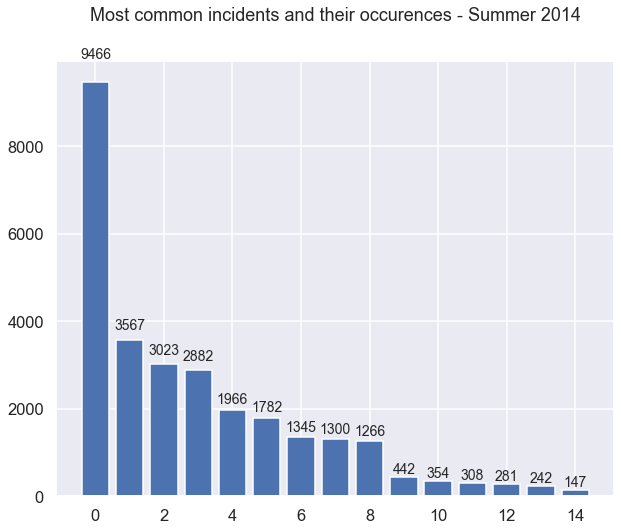

In [4]:
NUMBER_OF_INCIDENTS=15

most_common_categories = data['Category'].value_counts().head(NUMBER_OF_INCIDENTS)
labels = most_common_categories.index.tolist()

sns.set(style="darkgrid",context="talk")
fig,ax = plt.subplots(figsize=(10,8))

bars = ax.bar(range(NUMBER_OF_INCIDENTS), most_common_categories.tolist())

# attach counts on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height, height, ha='center', va='bottom',fontsize=14)

plt.title('Most common incidents and their occurences - Summer 2014',y=1.08)
plt.show()

## 2. Analyze the incident category per district
Now, let's have a look to where the different incidents happen mostly.

Build a heat map in order to visualize what kind of crime occurs in each district

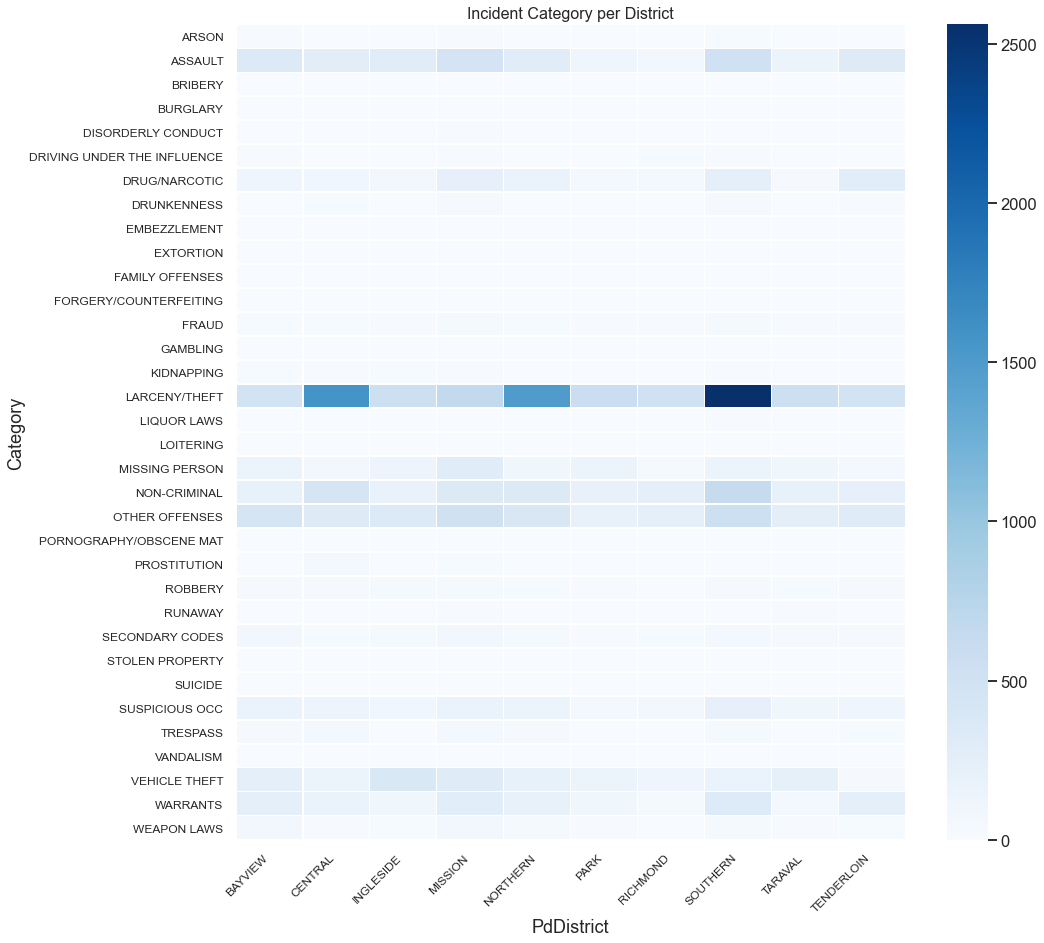

In [6]:
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(pd.crosstab(data['Category'],data['PdDistrict']),linewidths=.5, cmap="Blues")
plt.title('Incident Category per District',fontsize=16)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.savefig('crime_per_district.png')

## 3. Incident category versus time of the day
Let's have a look to the impact of the time on the number of incident, for the 10 most commons incident

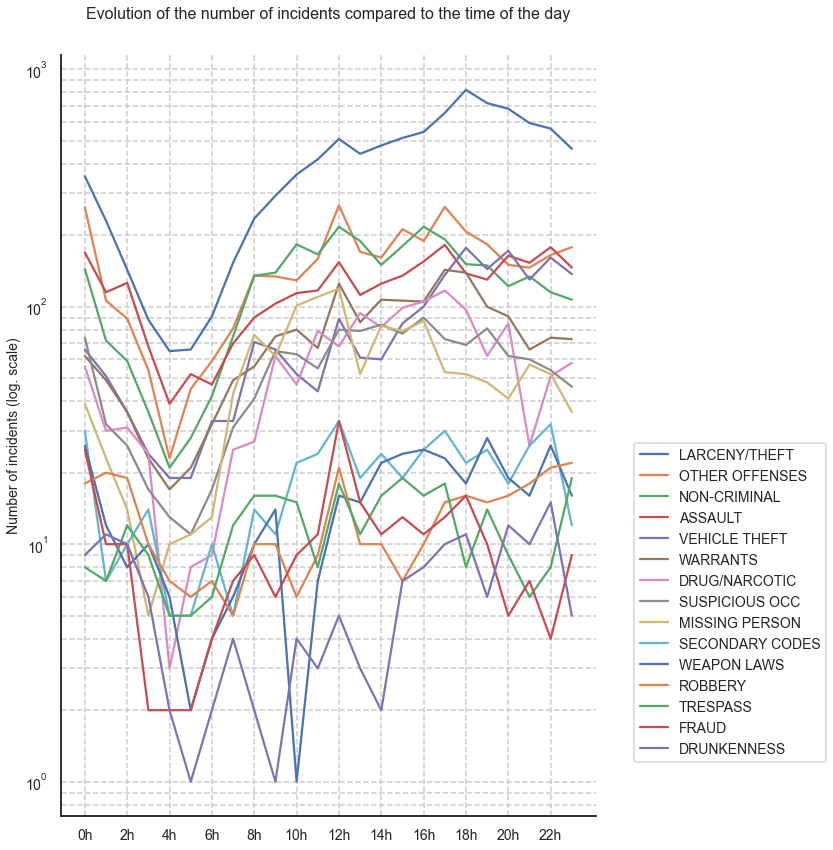

In [9]:
fig,ax = plt.subplots(figsize=(12,14))

# plot the data
for cat in most_common_categories.index:
    data[data['Category']==cat].groupby('hour')['hour'].count().plot(label=cat)

sns.set(style="white",context="talk")
sns.despine(fig)

# Shrink current axis by 20% and add the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.5),fontsize=14)

plt.xticks(np.arange(0,24,2),fontsize=14)
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%dh"))
plt.xlabel('')

plt.ylabel('Number of incidents (log. scale)',fontsize=14)
plt.yticks(np.arange(0,900,100),fontsize=14)
ax.set_yscale('log')

plt.title('Evolution of the number of incidents compared to the time of the day',fontsize=16,y=1.04)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')

## 4. Incident category over the summer
For ease of readiness, we will now consider 'ASSAULT','LARCENY/THEFT','VEHICLE THEFT', and 'DRUG/NARCOTIC' only, and look at how the number of incidents change over the summer

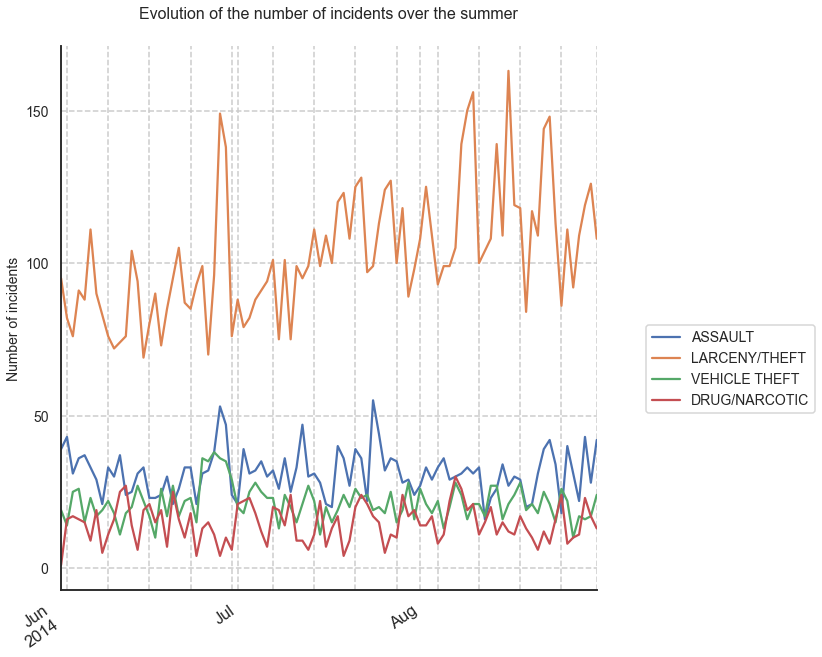

In [11]:
fig,ax = plt.subplots(figsize=(12,10))

# plot the data
for cat in ['ASSAULT','LARCENY/THEFT','VEHICLE THEFT','DRUG/NARCOTIC']:
    crimes = data[data['Category']==cat]
    crimes.groupby('Date')['Date'].count().plot(label=cat)

sns.set(style="white",context="talk")
sns.despine(fig)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.5),fontsize=14)

plt.xlabel('')
plt.xticks(rotation=35,ha='right')

plt.ylabel('Number of incidents',fontsize=14)
plt.yticks(np.arange(0,200,50),fontsize=14)

plt.title('Evolution of the number of incidents over the summer',fontsize=16,y=1.04)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')